# Chapter 2: Data and Sampling Distributions

## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.utils import resample
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import dates as mdates
from matplotlib.ticker import EngFormatter
from matplotlib.axis import Axis 

import seaborn as sns
sns.set(style="darkgrid")

## Random sampling and sample bias

- Sample:
    - A subset from a lager data set.
- Population:
    - The larger data set or idea of a data set.
- $N(n)$:
    - The size of population (sample).
- Random sampling:
    - Drawing elements into a sample at random.
- Stratified sampling:
    - Dividing the population into strata and randomly sampling from each strata.
- Stratum (pl. strata):
    - A homogeneous subgroup of a population with common characteristics.
- Simple random sample:
    - The sample that results from random sampling without stratifying the population.
- Bias:
    - Systematic error.
- Sample bias:
    - A sample that misrepresents the population.

## Sample mean vs. population mean
- Even in the era of big data, random sampling remains an important arrow in the data scientist’s quiver.
- Bias occurs when measurements or observations are systematically in error because they are not representative of the full population.
- Data quality is often more important than data quantity, and random sampling can reduce bias and facilitate quality improvement that would otherwise be prohibitively expensive.


## Selection bias

- Selection bias:
    - Bias resulting from the way in which observations are selected.
- Data snooping:
    - Extensive hunting through data in search of something interesting.
- Vast search effect:
    - Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

## Regression to the mean

- Specifying a hypothesis and then collecting data following randomization and random sampling principles ensures against bias.
- All other forms of data analysis run the risk of bias resulting from the data collection/analysis process (repeated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events).

## Sampling distribution of a statistic

- Sample statistic:
    - A metric calculated for a sample of data drawn from a larger population.
- Data distribution:
    - The frequency distribution of individual values in a data set.
- Sampling distribution:
    - The frequency distribution of a sample statistic over many samples or resamples.
- Central limit theorem:
    - The tendency of the sampling distribution to take on a normal shape as sample size rises.
- Standard error:
    - The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which by itself, refers to variability of individual data values).


It is important to distinguish between the distribution of the individual data points, known as the data distribution, and the distribution of a sample statistic, known as the sampling distribution.

In [2]:
df_loans = pd.read_csv('../data/loans_income.csv').squeeze('columns')
df_loans.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [3]:
sample_data = pd.DataFrame({
    'income' : df_loans.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [df_loans.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [df_loans.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results

,income,type
36927,25000.00,Data
12095,47000.00,Data
27051,52000.00,Data
47275,128000.00,Data
23688,75000.00,Data
...,...,...
995,62255.00,Mean of 20
996,60045.65,Mean of 20
997,66500.00,Mean of 20
998,70260.80,Mean of 20


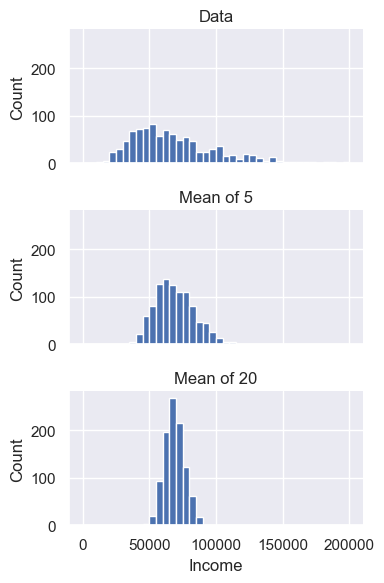

In [4]:
%%capture --no-display

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
g.tight_layout()

plt.show()

### Central limit theorem

- The mean drawn from multiple samples from a source will be familiar bell-shaped normal curve.
- Even if the source population isn't a normal distribution:
    - Since the sample size is large enough.
    - The data deviation isn't large.
- Allows formulas of normal-approximation like t-distributions.

### Standart error

- Sums up the variability in the sampling distribution.
- Can be estimated using the standart deviation $s$.
$$
    \text{Standart error} = SE = \frac{s}{\sqrt{n}}
$$
- Decrease with the sample size.


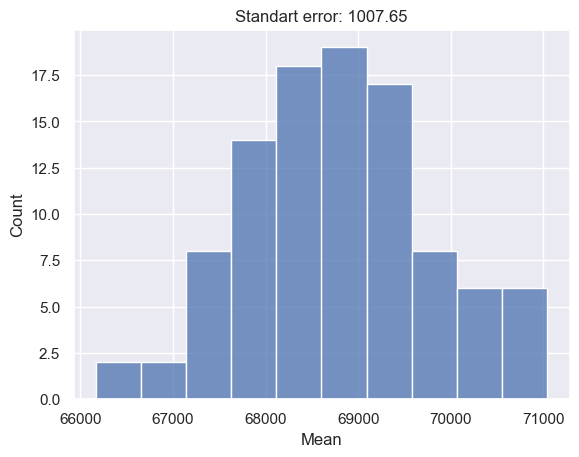

In [5]:
%%capture --no-display

df_loans_mean = {}
for i in range(100):
    bootstrap_sample = df_loans.sample(n=1000, replace=True, random_state=i)
    df_loans_mean[i] = bootstrap_sample.mean()

df_loans_mean = pd.Series(df_loans_mean, name='Mean')

sns.histplot(df_loans_mean, bins=10)

plt.title(f'Standart error: {df_loans_mean.std():.2f}')
plt.show()

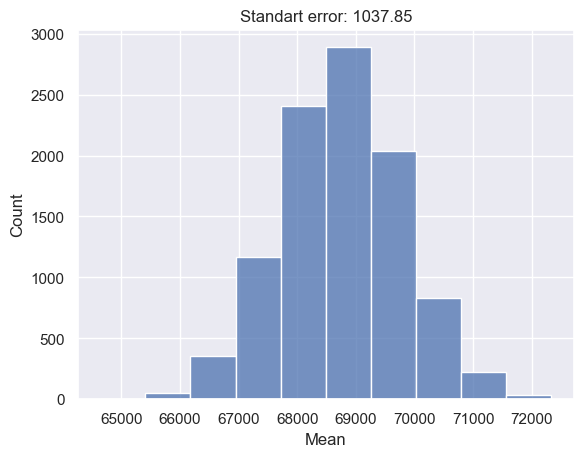

In [6]:
%%capture --no-display

df_loans_mean = {}
for i in range(10000):
    bootstrap_sample = df_loans.sample(n=1000, replace=True, random_state=i)
    df_loans_mean[i] = bootstrap_sample.mean()

df_loans_mean = pd.Series(df_loans_mean, name='Mean')

sns.histplot(df_loans_mean, bins=10)

plt.title(f'Standart error: {df_loans_mean.std():.2f}')
plt.show()

## Bootsrap

- Bootstrap sample:
    - A sample taken with replacement from an observed data.
- Resampling:
    - The processes of taking repeated samples from the observed data.
    - Both bootstrap and shuffling procedores.

The algorithm of bootstrapping resapling of the mean:
1. Draw a sample value and store it;
2. repeat $n$ times;
3. Record the mean of the $n$ resampled values;
4. Repeate the steps 1 to 3 $R$ times;
5. Use the $R$ results to:
    - Calculate the standard deviation;
    - Plot a boxplot or histogram
    - Find the confidence interval.

In [7]:
n = 1000
R = 100
results_mean = []
results_median = []

for i in range(R):
    bootstrap_sample = resample(df_loans, n_samples=n, replace=True)
    results_mean.append(bootstrap_sample.mean())
    results_median.append(bootstrap_sample.median())
    
results_mean = pd.Series(results_mean)
results_median = pd.Series(results_median)

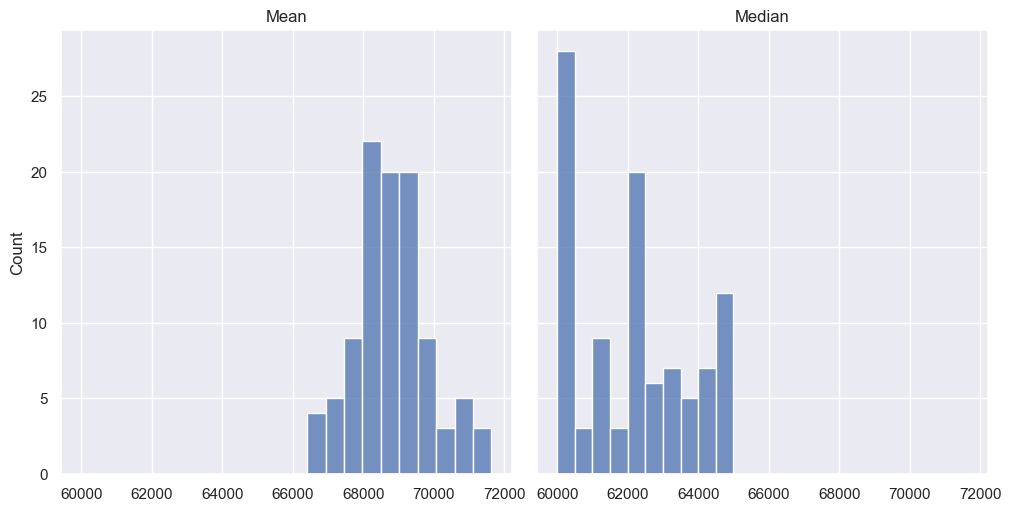

In [8]:
%%capture --no-display

fig, ax = plt.subplots(
    ncols=2,
    nrows=1,
    constrained_layout=True,
    sharey=True,
    sharex=True,
    figsize=(10, 5),
)


sns.histplot(results_mean, bins=10, ax=ax[0])
sns.histplot(results_median, bins=10, ax=ax[1])

ax[0].set_title('Mean')
ax[1].set_title('Median')

plt.show()

In [9]:
print(f'Bootstraping results for the mean of {R} sets of {n} samples.')
print(f'\nMedian:')
print(f'\tOriginal: {df_loans.median():.2f}')
print(f'\tBootstrap: {results_median.mean():.2f}')
print(f'\tBias: {(results_median.mean() - df_loans.median()):.2f}')

print(f'\nMean:')
print(f'\tOriginal: {df_loans.mean():.2f}')
print(f'\tBootstrap: {results_mean.mean():.2f}')
print(f'\tBias: {(results_mean.mean() - df_loans.mean()):.2f}')


Bootstraping results for the mean of 100 sets of 1000 samples.

Median:
	Original: 62000.00
	Bootstrap: 62019.56
	Bias: 19.56

Mean:
	Original: 68760.52
	Bootstrap: 68824.59
	Bias: 64.08


### Resampling vs bootstrapping

- Bootstrapping is a powerful tool for accessing the variability of a sample statistic.
- The bootstrap can be applied in a wide variety of circumstances without the extensive study of mathematical approximations to sampling distributions.
- Allow to study samples statistics where no mathematical approximation has ben developed.
- When applied to predictive models, aggregating bootstrap sample predicts outperforms a single model.

## Confidence intervals

Is a way to visualize the error in a sample estimate

- Confidence levels:
    - The percentage of confidence intervals, constructed in the same way from the sample population, that are expected to contain the statistics of interest.
- Interval endpoints:
    - To top and the bottom of the confidence intervals.


Given a sample of size $n=20$, and a sample statistic of interest (mean), the algorithm for a bootstrap confidence interval is as follows:
1. Draw a random sample of size $n$ with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many $R$ times.
4. For an $x\%$ confidence interval, trim $[(100-x) / 2]\%$ of the $R$ resample results from
either end of the distribution.
5. The trim points are the endpoints of an $x\%$ bootstrap confidence interval.

In [10]:
interval_90 = [0.05, 0.95]
interval_95 = [0.025, 0.975]

In [11]:
n = 20
R = 500
results_mean = []
results_median = []

np.random.seed(seed=3)
sample_20 = resample(df_loans, n_samples=n, replace=False)

for i in range(R):
    bootstrap_sample = resample(sample_20)
    results_mean.append(bootstrap_sample.mean())
    results_median.append(bootstrap_sample.median())
    
results_mean = pd.Series(results_mean)
results_median = pd.Series(results_median)

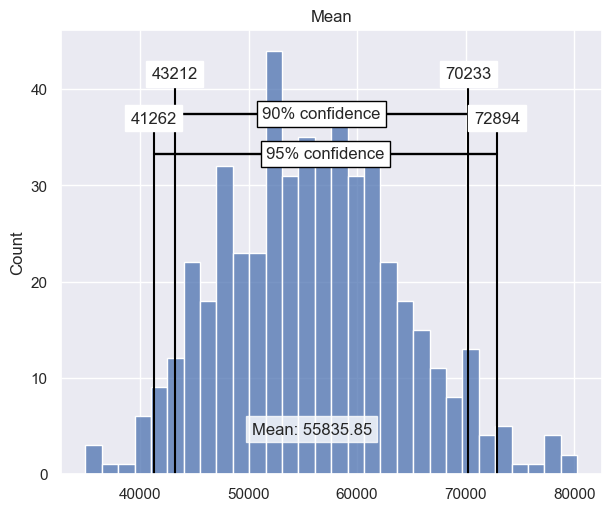

In [12]:
%%capture --no-display

results = results_mean

fig, ax = plt.subplots(
    ncols=1,
    nrows=1,
    constrained_layout=True,
    sharey=True,
    sharex=True,
    figsize=(6, 5),
)


sns.histplot(results, bins=30, ax=ax)

y_limits = ax.get_ylim()
x_limits = ax.get_xlim()


text_pos = y_limits[1] * 0.9
confidence_interval = results.quantile(interval_90)
for x in confidence_interval:
    ax.plot([x, x], [0, text_pos], color='black')
    ax.plot(confidence_interval, [text_pos * 0.9, text_pos * 0.9], color='black')
    ax.plot(confidence_interval, [text_pos * 0.9, text_pos * 0.9], color='black')
    ax.text(x, text_pos, f'{x:.0f}',
            bbox=dict(facecolor='white', edgecolor='white', alpha=1),
            horizontalalignment='center', verticalalignment='center')
ax.text(np.median(confidence_interval), text_pos * 0.9, f'90% confidence',
    bbox=dict(facecolor='white', edgecolor='black', alpha=1),
    horizontalalignment='center', verticalalignment='center')


text_pos = y_limits[1] * 0.8
confidence_interval = results.quantile(interval_95)
for x in confidence_interval:
    ax.plot([x, x], [0, text_pos], color='black')
    ax.plot(confidence_interval, [text_pos * 0.9, text_pos * 0.9], color='black')
    ax.plot(confidence_interval, [text_pos * 0.9, text_pos * 0.9], color='black')
    ax.text(x, text_pos, f'{x:.0f}',
            bbox=dict(facecolor='white', edgecolor='white', alpha=1),
            horizontalalignment='center', verticalalignment='center')
ax.text(np.median(confidence_interval), text_pos * 0.9, f'95% confidence',
    bbox=dict(facecolor='white', edgecolor='black', alpha=1),
    horizontalalignment='center', verticalalignment='center')

text_pos = y_limits[1] * 0.1
ax.text(np.mean(results), text_pos, f'Mean: {np.mean(results):.2f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.8),
        horizontalalignment='center', verticalalignment='center')

ax.set_title('Mean')
plt.show()

- Confidence interval is a visualization of to present estimates interval range.
- The more data you have, less variable the estimate is.
- The lower the level of confidence one can tolerate, narrower the confidence interval is.
- Bootstrap is a way to build confidence intervals.

## Normal distribution

- The bell-shaped normal distribution.
- Error:
    - Difference between a data and the predicted or averaged value.
- Standardize:
    - Subtract the mean and divide by the standard deviation.
- z-score:
    - The result of standardize one data point.
- Standard normal:
    - A normal distribution with mean equal to zero and standard deviation equal to one.
- QQ-Plot:
    - A plot to visualize how close a sample distribution is to a specific distribution.


### Standard normal and QQ-plots

In a standard normal plot, the x-axis is expressed in units of standard deviations away from the mean.`

- The QQ-plot is used to visualize how close a sample distribution is  from a specific distribution
    - In this case normal distribution.
- The y-axis shows the ordered z-score.
- The x-axis is the quantile from a normal distribution.
- If the data points rest in a diagonal line
    - Since the data is normalized the number correspond to the number of standard deviation from the mean.

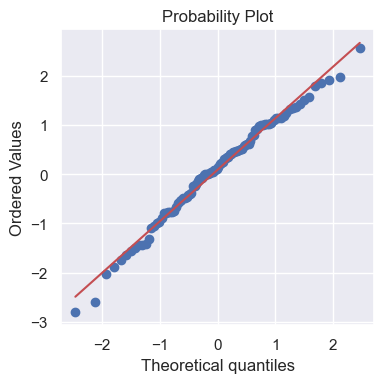

In [13]:
# QQ-plot for 100 points randomly generated from a normal distribution
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

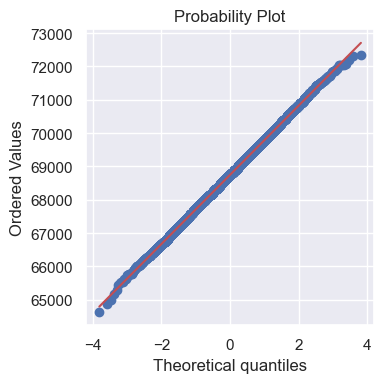

In [14]:
# QQ-plot for distribution of the mean obtained from the loans dataframe.
fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df_loans_mean, plot=ax)

plt.tight_layout()
plt.show()

- Converting data to z-scores by standardizing or normalizing, does not make the data normally distributed.
- It just puts the data on the same scale as the standard normal distribution.
- Often for comparison purposes.

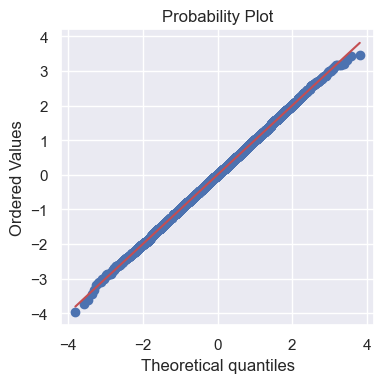

In [15]:
# QQ-plot for the standardize distribution of the mean obtained from the loans dataframe.

df_loans_mean_std = (df_loans_mean - df_loans_mean.mean()) / df_loans_mean.std()

fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df_loans_mean_std, plot=ax)

plt.tight_layout()
plt.show()

- The normal distribution was essential to the historical development of statistics, as it permitted mathematical approximation of uncertainty and variability.
- Raw data is typically not normally distributed, errors often are, as are averages and totals in large samples.
- To convert data to z-scores, you subtract the mean of the data and divide by the standard deviation.

### Long-tailed distributions

- Some times the raw data distribution is asymmetric.
- Tail:
    - The long narrow portion of a frequency distribution.
    - Where extreme values occurs at low frequency.
- Skew:
    - Where one tail of a distribution is longer than the other.

In [16]:
df_netflix = pd.read_csv('../data/sp500_data.csv', index_col=0)['NFLX']

df_netflix.index = pd.to_datetime(df_netflix.index)

df_netflix_log = np.log(df_netflix[df_netflix > 0])
df_netflix_log

2002-05-23   -3.218875
2002-06-03   -3.024723
2002-06-05   -3.312402
2002-06-06   -3.437565
2002-06-10   -3.843030
                ...   
2015-06-18   -2.392175
2015-06-22    0.315854
2015-06-23   -0.023123
2015-06-29   -0.320597
2015-06-30   -0.710431
Name: NFLX, Length: 1613, dtype: float64

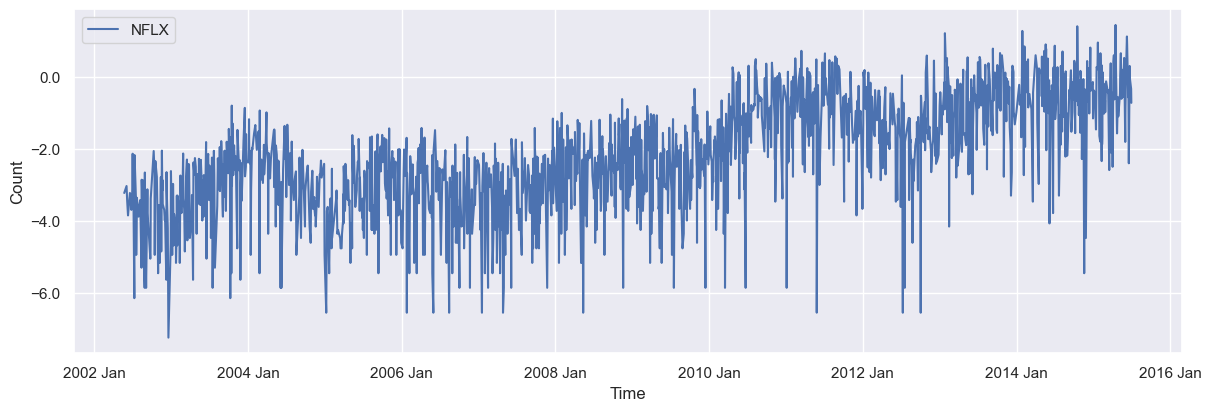

In [17]:
fig, ax = plt.subplots(sharey=False,
                       sharex=False,
                       constrained_layout=True,
                       figsize=(12, 4))
						
#fig.suptitle('Sup Title')


ax.plot(df_netflix_log.index.astype('datetime64[ns]'), df_netflix_log, label=f"{df_netflix_log.name}")

ax.set_title('')
ax.set_xlabel('Time')
ax.set_ylabel('Count')
#ax.set_yscale('log')

# Y-axis Eng format
formatter_y = EngFormatter(places=1)
ax.yaxis.set_major_formatter(formatter_y)
	
# X-axis date format
formatter_x = EngFormatter(places=1)
ax.yaxis.set_major_formatter(formatter_x)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=0, horizontalalignment='center')

plt.legend()
plt.show()

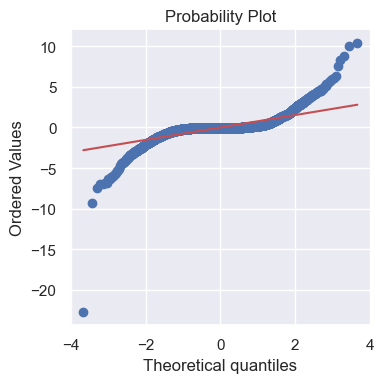

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))

df_netflix_std = (df_netflix - df_netflix.mean()) / df_netflix.std()

stats.probplot(df_netflix_std, plot=ax)

plt.tight_layout()
plt.show()

- The points far from the line shows that the distribution is different from a normal distribution.
- The points are close to the line within one standard deviation from the mean.
- Normal in the middle.

- Most data is not normal distributed.
- Assuming a normal distribution can lead to underestimation of extreme values.
    - Black swans.

## Student's T-distribution

- Normally shaped distribution.
- Thicker and long on tails.
- Distribution of sample means are typically shaped like a t-distribution.
- The large the sample the more normally shaped the t-distribution.

- $n$:
    - Sample size.
- Degrees of freedom:
    - Parameter to adjust the t-distribution to different sample sizes, statistics and number of groups.
- Different statistics can be compared after standardization to the t-distribution to estimate it's confidence intervals.
- For a sample size $n$ with it's mean $\bar{x}$, standard deviation $s$ a 90% confidence interval around the mean is given by:
$$
    \bar{x} \pm t_{n - 1}(0.05)\cdot\frac{s}{\sqrt{n}}
$$
- Where $t_{n - 1}(0.05)$ is the t-distribution with $(n - 1)$ degrees of freedom.
- Chopping of 5% of the t-distribution at either end.


- The t-distribution is a family of distributions shaped like normal distribution but with longer tails.
- Mostly used as reference for distribution sampling means, differences between two samples means, regression parameters, etc.

## Binomial distribution

- Yes/No distribution.
- Central to understanding the ideal of a set of trails, with two possible outcomer.

- Trial:
    - Event with a discrete outcome.
- Sucess:
    - Outcome of the interest in the trial.
- Binomial:
    - Having two outcomes.
    - Yes/No.
    - 0/1.
- Binomial trial:
    - Bernoulli Trial.
    - Trial with two outcomes.
- Binomial distribution:
    - Distribution of numbers of successes in $x$ trials.
    - Bernoulli distribution.

- Number of successes $x$ in a given number of trials $n$ with probability $p$.
- Family of distribution depending on $n$ and $p$.

In [19]:
#If the probability of a click converting to a sale is 0.02.
# What is the probability of observing 0 sales in 200 clicks.
stats.binom.pmf(0, n=200, p=0.02)

0.017587946605721567

In [20]:
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [22]:
stats.binom.pmf?

Signature: stats.binom.pmf(k, *args, **kwds)
Docstring:
Probability mass function at k of the given RV.

Parameters
----------
k : array_like
    Quantiles.
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    Location parameter (default=0).

Returns
-------
pmf : array_like
    Probability mass function evaluated at k
File:      c:\users\alvar\miniconda3\envs\ds-min\lib\site-packages\scipy\stats\_distn_infrastructure.py
Type:      method

In [23]:
stats.binom.cdf?

Signature: stats.binom.cdf(k, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
k : array_like, int
    Quantiles.
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    Location parameter (default=0).

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `k`.
File:      c:\users\alvar\miniconda3\envs\ds-min\lib\site-packages\scipy\stats\_distn_infrastructure.py
Type:      method

In [35]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

- The mean of a binomial distribution is $n\times p$.
- The variance is $n\times p(1 - p)$.
- Then the number of trials is large the binomial distribution became the normal distribution.

- Binomial outcomes are important to model since they represents fundamental decisions (Yes/No).
- Binomial trials is an experiment of two outcomes.
    - One probability $p$ and other probability $(1 - p)$.

## Chi-Square distribution

- Chi-Square statistics measure the extend which a a result depart from the null expectation of independence.
- Test if one variable is independent of other.
- Standardizes the statistics to compare to a reference distribution.
- Useful to determine if different treatments differs one another.
- Is the distribution of the distribution of a statistics under repeated resample draws from the null model.

- The chi-square distribution topically concerns with counts of subjects or items falling into categories.
- The chi-square statistics measures the extend of departure from what would expect in a null model.